In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'E:\heat_stock\Datasets\healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.shape

(5110, 12)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [8]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
df.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [11]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [12]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [13]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [14]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

## Dataset is highely imbalance
1. strock
2. hypertension

## Visualization

In [94]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [15]:
num_cols=df.select_dtypes(exclude='object').columns

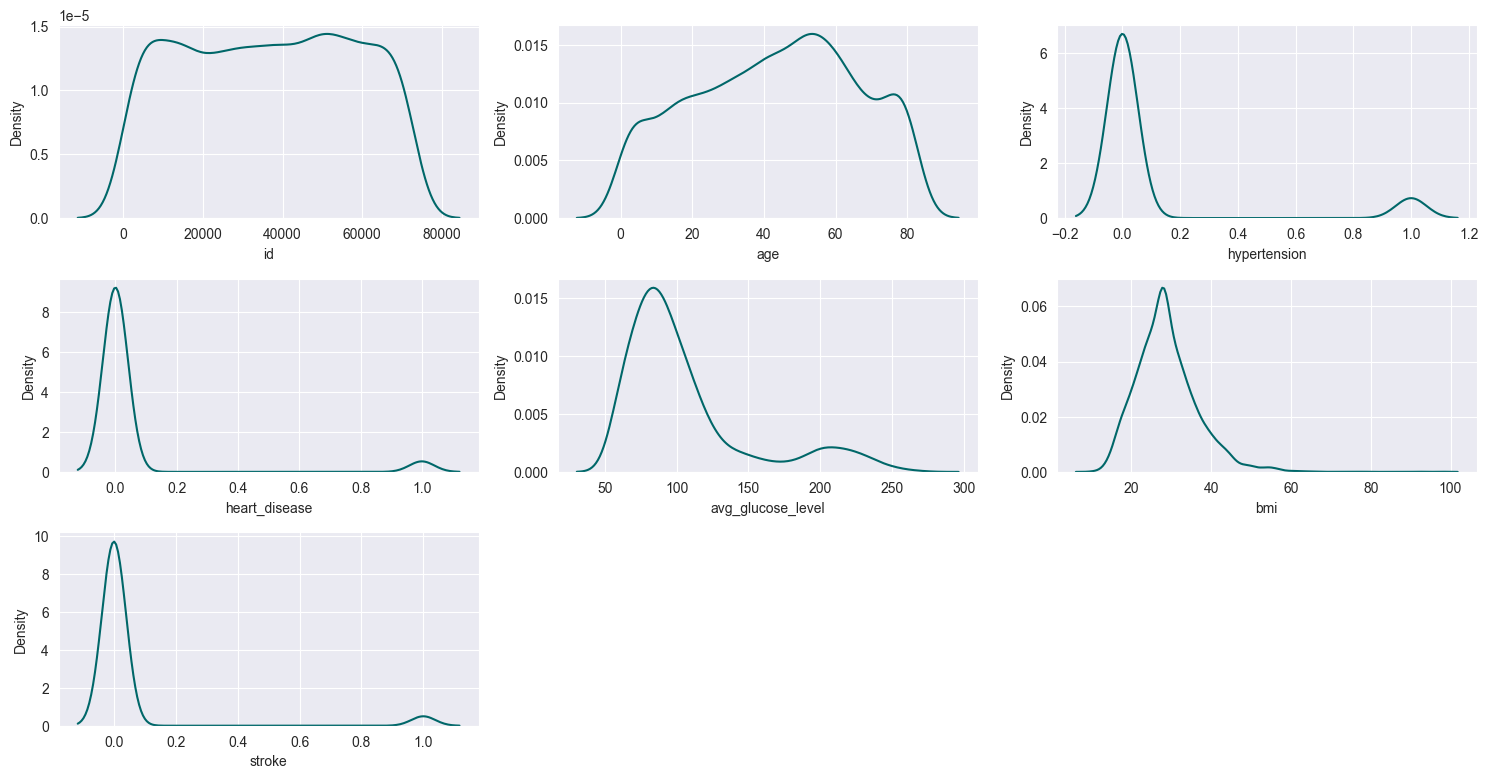

In [16]:
# Set the style and figure size
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))

# Loop through the numeric columns and plot each one
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, 1 + i)
    sns.kdeplot(df[col],  color='#006769')
    plt.xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

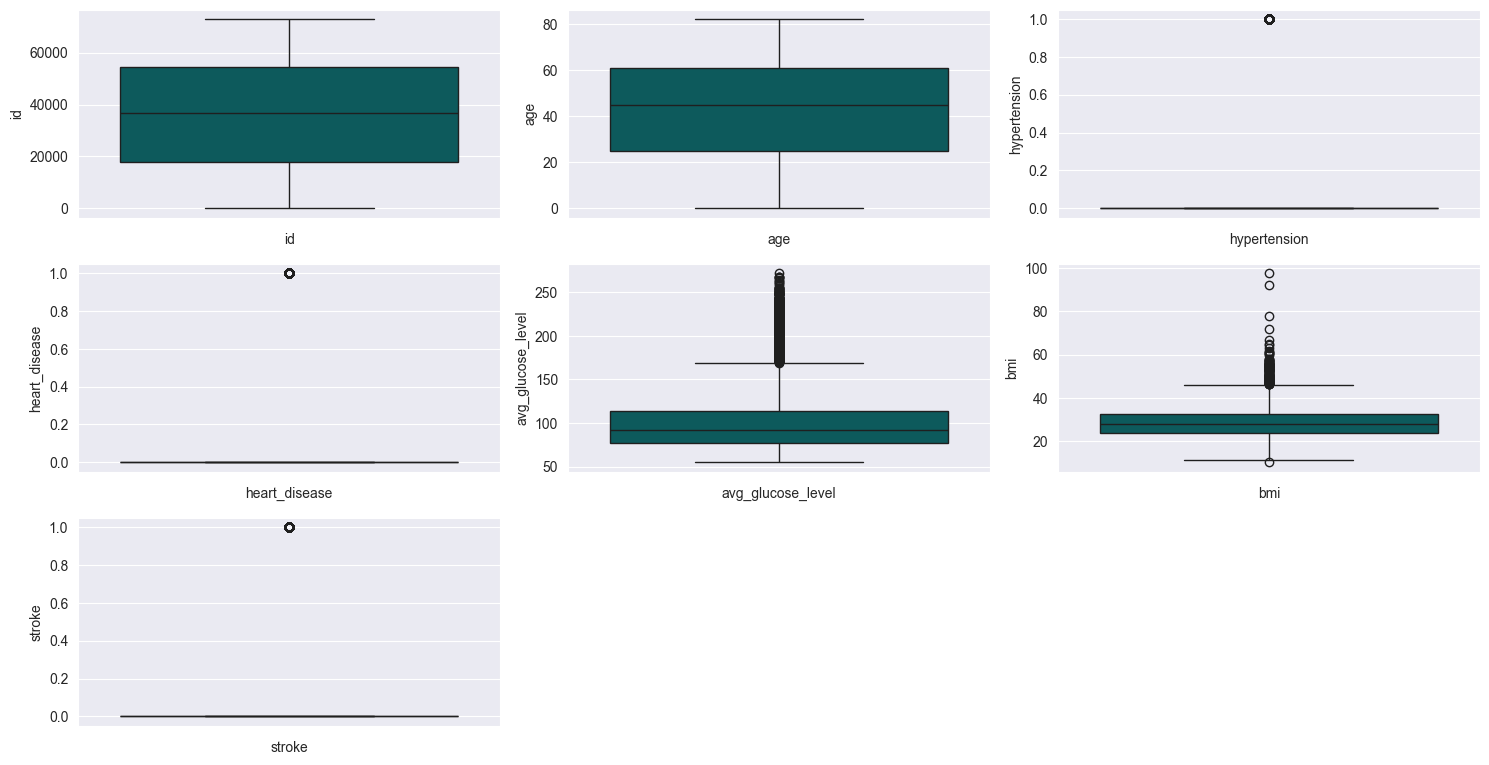

In [17]:
# Set the style and figure size
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))

# Loop through the numeric columns and plot each one
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, 1 + i)
    sns.boxplot(df[col],  color='#006769')
    plt.xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
cate_cols=df.select_dtypes(include='object').columns

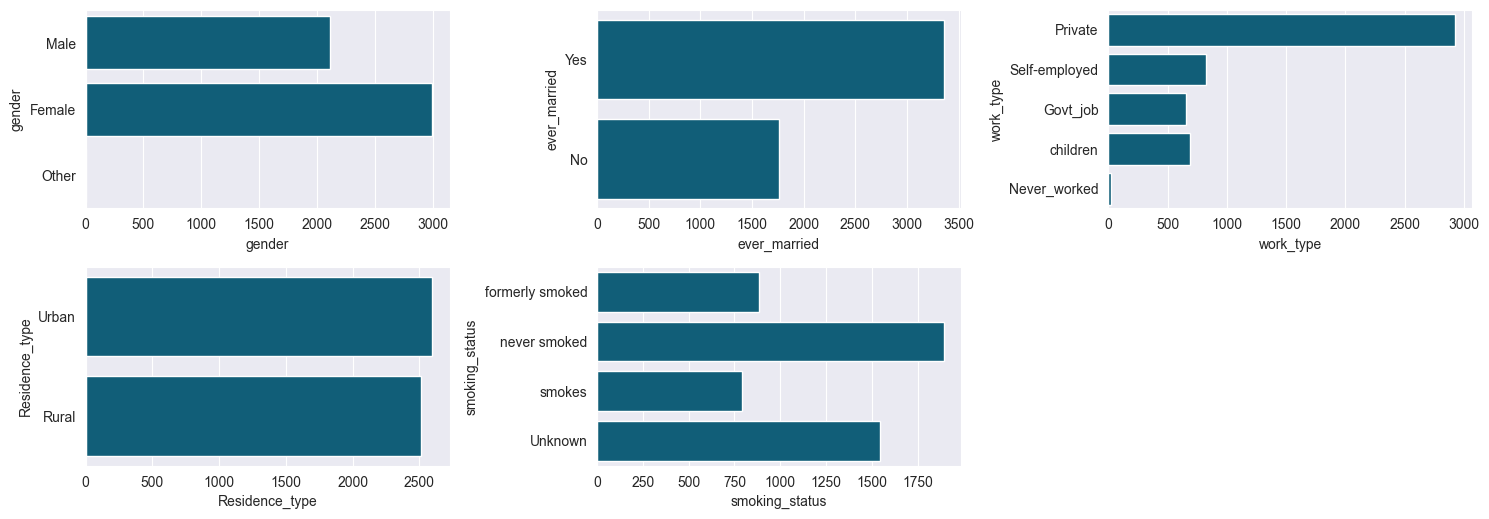

In [19]:
# Set the style and figure size
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))

# Loop through the numeric columns and plot each one
for i, col in enumerate(cate_cols):
    plt.subplot(4, 3, 1 + i)
    sns.countplot(df[col],  color='#006789')
    plt.xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: ylabel='stroke'>

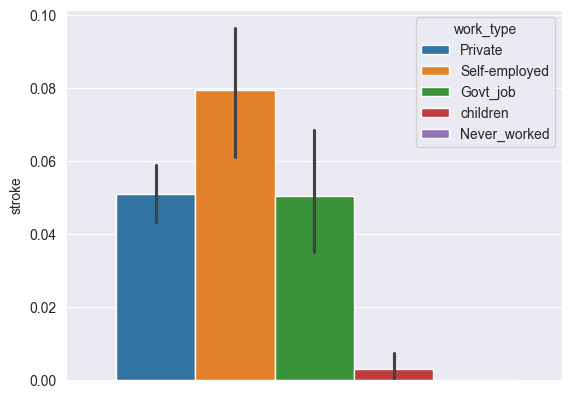

In [20]:
sns.barplot(hue=df['work_type'],y=df['stroke'])

In [21]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [22]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

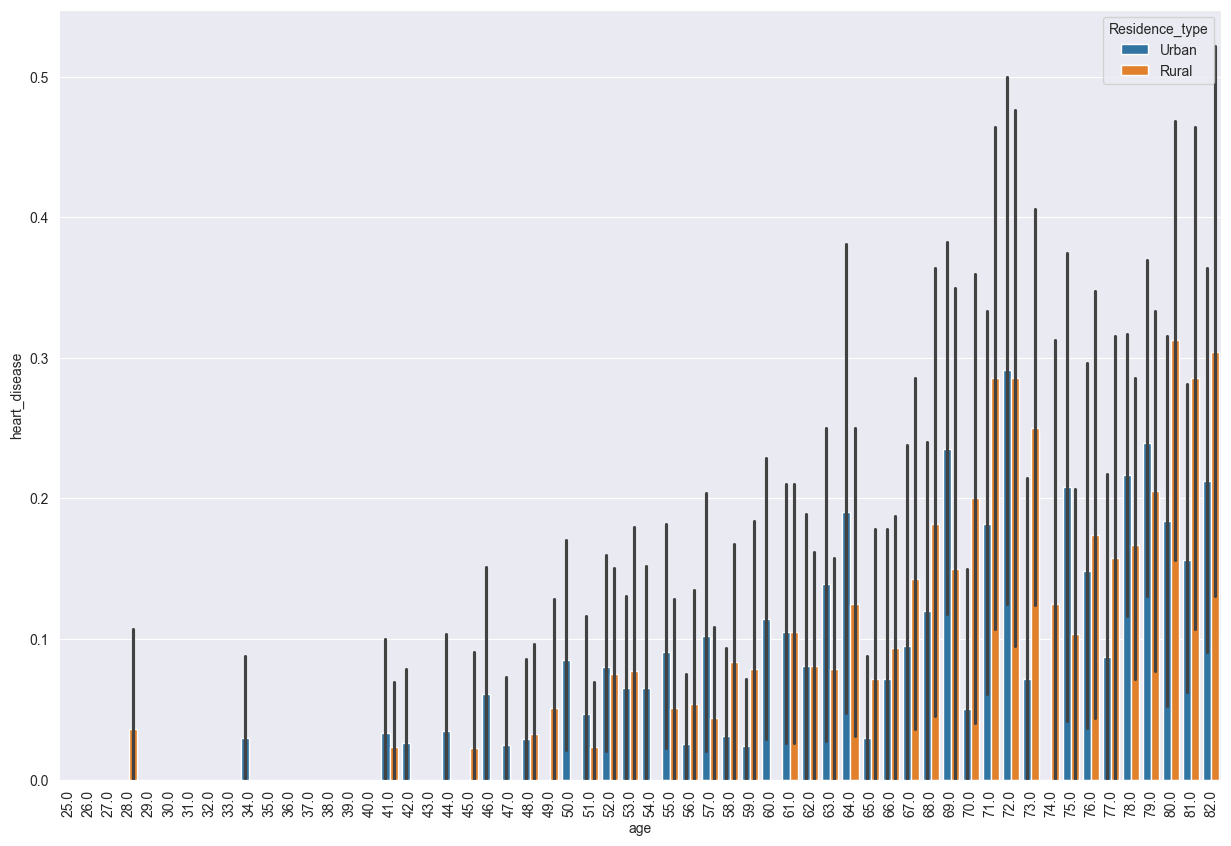

In [23]:
age=df[df['age']>=25]
plt.figure(figsize=(15, 10))
sns.barplot(x=age.age,y=df['heart_disease'],hue=df['Residence_type'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Density', ylabel='avg_glucose_level'>

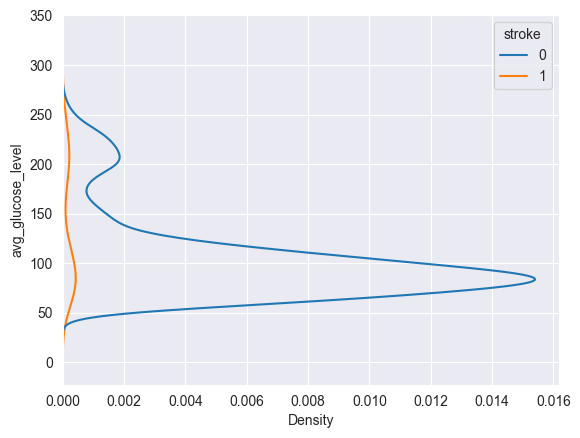

In [24]:
sns.kdeplot(hue=df['stroke'],y=df['avg_glucose_level'])

<Axes: xlabel='gender', ylabel='count'>

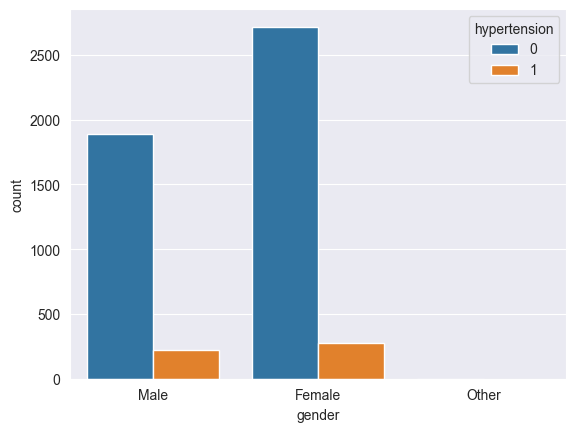

In [25]:
sns.countplot(x=df['gender'],hue=df['hypertension'])

<Axes: xlabel='gender', ylabel='count'>

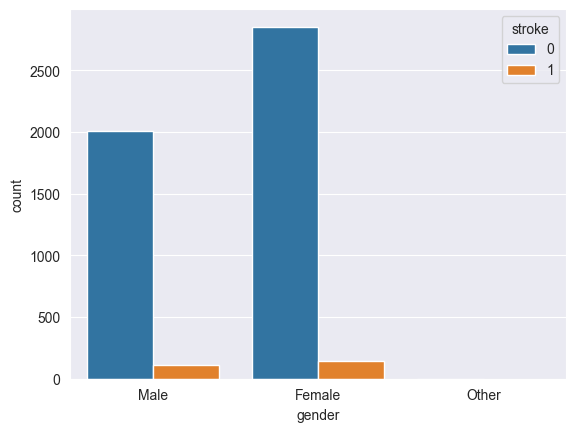

In [26]:
sns.countplot(x=df['gender'],hue=df['stroke'])

In [27]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [28]:
gen_map_cols={'Male':1, 'Female':2, 'Other':0}
df['gender']=df['gender'].map(gen_map_cols)

In [29]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [31]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [32]:
df['ever_married']=df['ever_married'].map({'Yes':1, 'No':0})
df['work_type']=df['work_type'].map({'Private':4, 'Self-employed':3, 'Govt_job':2, 'children':1, 'Never_worked':0})
df['Residence_type']=df['Residence_type'].map({'Urban':0, 'Rural':1})

In [33]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,4,0,228.69,36.6,formerly smoked,1
1,51676,2,61.0,0,0,1,3,1,202.21,28.1,never smoked,1
2,31112,1,80.0,0,1,1,4,1,105.92,32.5,never smoked,1
3,60182,2,49.0,0,0,1,4,0,171.23,34.4,smokes,1
4,1665,2,79.0,1,0,1,3,1,174.12,24.0,never smoked,1


In [34]:
gender=df.gender.value_counts(normalize=True)

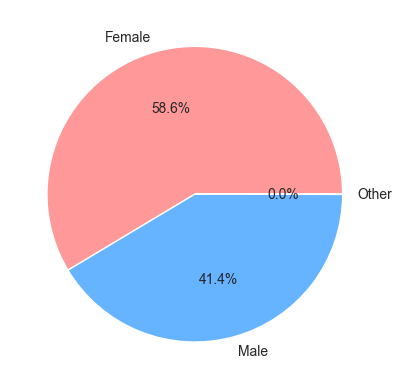

In [35]:
plt.pie(gender,labels=['Female','Male', 'Other'],autopct='%1.1f%%',colors=['#ff9999','#66b3ff'])
plt.show()

# smote

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
df2=df.copy()

In [38]:
good=df2['stroke'][df2['stroke']==0]
bad=df2['stroke'][df2['stroke']==1]

In [43]:
sns.countplot(x=df2['stroke'])

<Axes: ylabel='count'>

Error in callback <function flush_figures at 0x000001A578CB0310> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [101]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,4,0,228.69,36.6,1,1
1,51676,2,61.0,0,0,1,3,1,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,4,1,105.92,32.5,2,1
3,60182,2,49.0,0,0,1,4,0,171.23,34.4,3,1
4,1665,2,79.0,1,0,1,3,1,174.12,24.0,2,1


In [46]:
from sklearn.preprocessing import LabelEncoder
df2['smoking_status']=LabelEncoder().fit_transform(df2['smoking_status'])

In [100]:
df2.shape

(5110, 12)

In [55]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
x,y= smote.fit_resample(df2,df2['stroke'])

In [108]:
x.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [58]:
x.shape

(9722, 12)

In [59]:
y.shape

(9722,)

In [60]:
x

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.000000,0,1,1,4,0,228.690000,36.600000,1,1
1,51676,2,61.000000,0,0,1,3,1,202.210000,28.100000,2,1
2,31112,1,80.000000,0,1,1,4,1,105.920000,32.500000,2,1
3,60182,2,49.000000,0,0,1,4,0,171.230000,34.400000,3,1
4,1665,2,79.000000,1,0,1,3,1,174.120000,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9717,1821,2,65.055885,0,0,1,3,0,101.593170,27.573180,1,1
9718,71290,2,71.243037,0,0,1,2,0,258.688025,38.256458,1,1
9719,13754,1,60.042895,0,0,1,3,0,240.856066,43.959365,2,1
9720,27165,2,74.259869,0,0,1,3,1,78.677416,29.244490,0,1


In [61]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9717    1
9718    1
9719    1
9720    1
9721    1
Name: stroke, Length: 9722, dtype: int64

In [57]:
y.value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

In [113]:
data=pd.concat([x,y],axis=1)

In [114]:
data.shape

(9722, 12)

In [115]:
data.to_csv('dataset.csv')

# Cross vlidation

In [67]:
from sklearn.model_selection import train_test_split,StratifiedKFold

In [62]:
df.drop('id',axis=1,inplace=True)
x=x.drop('stroke',axis=1)


In [89]:
x.shape

(9722, 11)

In [90]:
x.duplicated().sum()

0

In [63]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9717    1
9718    1
9719    1
9720    1
9721    1
Name: stroke, Length: 9722, dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder
x['smoking_status']=LabelEncoder().fit_transform(x['smoking_status'])

In [65]:
x

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1,67.000000,0,1,1,4,0,228.690000,36.600000,1
1,51676,2,61.000000,0,0,1,3,1,202.210000,28.100000,2
2,31112,1,80.000000,0,1,1,4,1,105.920000,32.500000,2
3,60182,2,49.000000,0,0,1,4,0,171.230000,34.400000,3
4,1665,2,79.000000,1,0,1,3,1,174.120000,24.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
9717,1821,2,65.055885,0,0,1,3,0,101.593170,27.573180,1
9718,71290,2,71.243037,0,0,1,2,0,258.688025,38.256458,1
9719,13754,1,60.042895,0,0,1,3,0,240.856066,43.959365,2
9720,27165,2,74.259869,0,0,1,3,1,78.677416,29.244490,0


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=42)

In [69]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

In [70]:
x_train_sc

array([[-0.19129297,  0.        , -1.98380685, ..., -0.3230427 ,
        -1.8422665 , -0.5       ],
       [ 0.63062194,  1.        ,  0.23867276, ..., -0.24591027,
        -0.22650818,  0.        ],
       [ 0.38055091,  0.        ,  0.66810551, ..., -0.60403572,
        -0.15100545,  1.        ],
       ...,
       [-0.83898803,  1.        ,  0.06799397, ...,  0.67486983,
        -0.54594039,  0.        ],
       [-0.20593463,  1.        , -0.48805957, ..., -0.02591258,
         3.27681828,  1.        ],
       [ 0.51261654,  0.        ,  0.11616478, ...,  1.32675412,
         1.32194868,  0.5       ]])

In [71]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
skfold=StratifiedKFold(n_splits=10)


In [72]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [73]:
cv=cross_val_score(reg,x_train_sc,y_train,cv=skfold,)

In [74]:
score=cv.mean()

In [75]:
score

0.8337505795085768

# Loggistic regression

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=42)
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

In [77]:
reg.fit(x_train_sc,y_train)
y_pred=reg.predict(x_test_sc)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8409810126582279

## Hyperparameter tuning

In [79]:
param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [80]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=10,refit=True,verbose=3,n_jobs=-1)

In [81]:
grid.fit(x_train_sc,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=3)

In [82]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [83]:
grid.best_score_

0.8341676325142945

In [84]:
reg.set_params(**grid.best_params_)
reg.fit(x_train_sc,y_train)
y_pred=reg.predict(x_test_sc)
accuracy_score(y_test,y_pred)

0.8386075949367089

In [85]:
grid=GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=skfold,refit=True,verbose=3,n_jobs=-1)

In [86]:
grid.fit(x_train_sc,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=3)

In [87]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [88]:
reg.set_params(**grid.best_params_)
reg.fit(x_train_sc,y_train)
y_pred=reg.predict(x_test_sc)
accuracy_score(y_test,y_pred)

0.8386075949367089